<a href="https://colab.research.google.com/github/Sommnie/DeepLearning/blob/main/%EC%9C%A0%EB%B0%A9%EC%95%94%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#유방암 데이터 세트 준비
#사이킷런의 datasets 모듈 아래에 있는 load_breast_cancer() 함수를 사용

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn .datasets import load_breast_cancer
breast_1 = load_breast_cancer()

In [17]:
#입력데이터 확인
breast_1

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [18]:

breast_1.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
#문제, 정답 담아두기
y=breast_1.target
x=breast_1.data

In [5]:
x.shape, y.shape

((569, 30), (569,))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1230)

In [7]:
x_train.shape, y_train.shape

((426, 30), (426,))

In [8]:
#모델링
#Sequential() Sequential()을 사용하면 간단한 순차적인 구조를 가진 모델을 쉽게 구성할 수 있습니다. 즉, 입력층부터 출력층까지 차례대로 쌓아가는 것으로 모델을 구성합니다.

from keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [9]:
#모델 구조 설계
model = Sequential() #모델 생성
model.add(InputLayer(input_shape=(30,))) # 층을 처음 쌓을 때 데이터의 크기(입력층 정의)
#입력층과 은닉층 추가
model.add(Dense(units=32, activation='sigmoid')) #기본 층 쌓아 올리기
model.add(Dense(units=16, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid')) #출력층 추가

In [10]:
#모델 학습/평가 방법 설정

#모델 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Epoch 1/300
11/11 [==============================] - 3s 97ms/step - loss: 0.7393 - accuracy: 0.6029 - val_loss: 0.6450 - val_accuracy: 0.6628
Epoch 2/300
11/11 [==============================] - 0s 16ms/step - loss: 0.6908 - accuracy: 0.6029 - val_loss: 0.6215 - val_accuracy: 0.6628
Epoch 3/300
11/11 [==============================] - 0s 16ms/step - loss: 0.6573 - accuracy: 0.6029 - val_loss: 0.6067 - val_accuracy: 0.6628
Epoch 4/300
11/11 [==============================] - 0s 19ms/step - loss: 0.6350 - accuracy: 0.6029 - val_loss: 0.6015 - val_accuracy: 0.6628
Epoch 5/300
11/11 [==============================] - 0s 18ms/step - loss: 0.6235 - accuracy: 0.6029 - val_loss: 0.5941 - val_accuracy: 0.6628
Epoch 6/300
11/11 [==============================] - 0s 24ms/step - loss: 0.6136 - accuracy: 0.6029 - val_loss: 0.5891 - val_accuracy: 0.6628
Epoch 7/300
11/11 [==============================] - 0s 16ms/step - loss: 0.6048 - accuracy: 0.6029 - val_loss: 0.5846 - val_accuracy: 0.6628
Epoch 

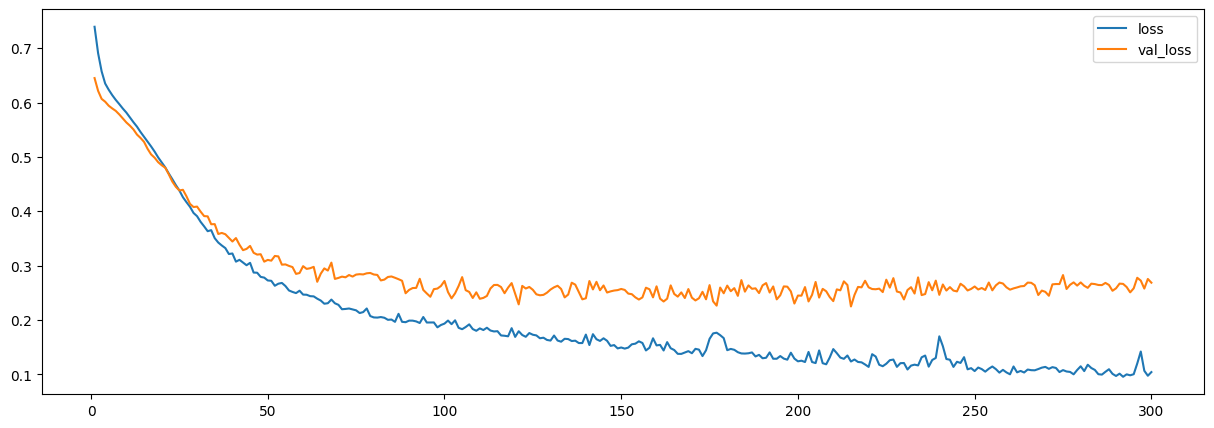

In [11]:
#모델 학습 및 평가결과 시각화
breast_history = model.fit(x_train, y_train, validation_split=0.2, epochs=500)

import matplotlib.pyplot as plt #라이브러리 설치

plt.figure(figsize=(15,5))
plt.plot(range(1,301), breast_history.history['loss'],label='loss') # 훈련 데이터에 대한 그래프
# 검증데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

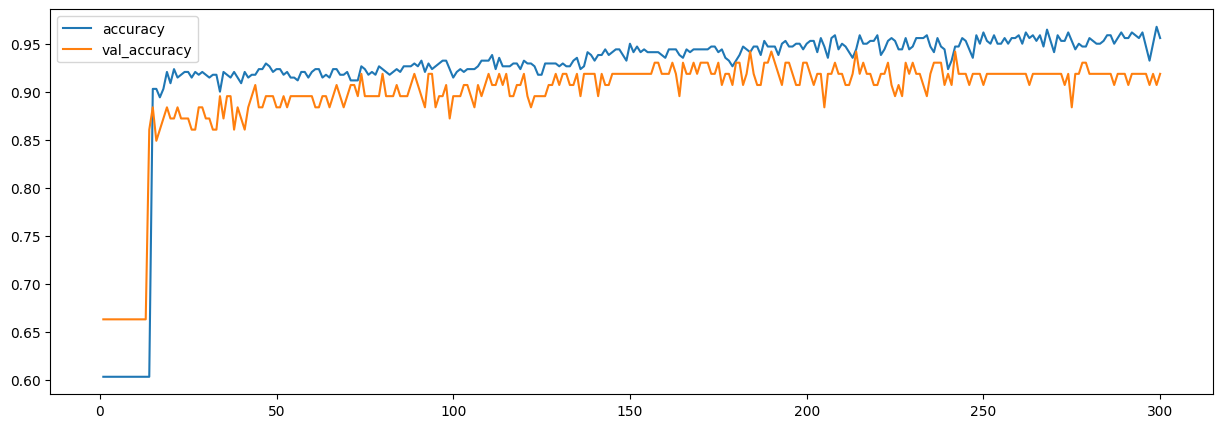

In [12]:
# 정확도로 그래프 그리기
plt.figure(figsize=(15,5))
# 훈련 데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['accuracy'],label='accuracy')
# 검증데이터에 대한 그래프
plt.plot(range(1,301), breast_history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [13]:
#모델 평가
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9231


[0.23057471215724945, 0.9230769276618958]

In [14]:
score = model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.2306 - accuracy: 0.9231


In [15]:
score[0] #loss 값

0.23057471215724945

In [16]:
score[1] #accuracy 값

0.9230769276618958